In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

from clustering_library import FeatureEngineer
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

## Load Cleaned Data

In [2]:
data_path = "../data/processed/cleaned_uk_data.csv"

engineer = FeatureEngineer(data_path)
df = engineer.load_data()
df.head()

e:\AIO\Module 6\customer-segmentation\notebooks\../src\clustering_library.py:165: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(self.data_path)


Kích thước dữ liệu: (485123, 11)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8


### Create features at customer level.

In [3]:
print(f"Total features will be created: {len(engineer.feature_customer)}")
print("Features list:")
for i, feature in enumerate(engineer.feature_customer, 1):
    print(f"{i:2d}. {feature}")

Total features will be created: 16
Features list:
 1. Sum_Quantity
 2. Mean_UnitPrice
 3. Mean_TotalPrice
 4. Sum_TotalPrice
 5. Count_Invoice
 6. Count_Stock
 7. Mean_InvoiceCountPerStock
 8. Mean_StockCountPerInvoice
 9. Mean_UnitPriceMeanPerInvoice
10. Mean_QuantitySumPerInvoice
11. Mean_TotalPriceMeanPerInvoice
12. Mean_TotalPriceSumPerInvoice
13. Mean_UnitPriceMeanPerStock
14. Mean_QuantitySumPerStock
15. Mean_TotalPriceMeanPerStock
16. Mean_TotalPriceSumPerStock


In [4]:
customer_features = engineer.create_customer_features()
customer_features.head()

Calculating customer features...
Processed 500/3921 customers...
Processed 1000/3921 customers...
Processed 1500/3921 customers...
Processed 2000/3921 customers...
Processed 2500/3921 customers...
Processed 3000/3921 customers...
Processed 3500/3921 customers...
✓ Customer features calculated!


,CustomerID,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
0,000nan,405650.0,6.248856,13.125415,1716830.53,1373.0,3401.0,38.459865,95.267298,34.401125,295.447924,41.005373,1250.422819,10.903397,119.273743,14.841714,504.801685
1,012346,74215.0,1.040000,77183.600000,77183.60,1.0,1.0,1.000000,1.000000,1.040000,74215.000000,77183.600000,77183.600000,1.040000,74215.000000,77183.600000,77183.600000
2,012747,1275.0,4.367864,40.737961,4196.01,11.0,42.0,2.452381,9.363636,4.253949,115.909091,43.645453,381.455455,4.844583,30.357143,27.983690,99.905000
3,012748,25747.0,2.656279,7.338353,33719.73,209.0,1768.0,2.598982,21.985646,8.916506,123.191388,16.378101,161.338421,2.726409,14.562783,8.176556,19.072245
4,012749,1471.0,4.999950,20.557186,4090.88,5.0,160.0,1.243750,39.800000,5.095433,294.200000,21.871511,818.176000,4.785563,9.193750,20.025448,25.568000


### Features description

**Basic features**:

1. **Sum_Quantity**:  Total number of products purchased.
2. **Mean_UnitPrice**: Average price per unit across all purchases.
3. **Mean_TotalPrice**: Average amount per transaction.
4. **Sum_TotalPrice**: Total amount spent (customer lifetime value)
5. **Count_Invoice**: Number of unique transactions.
6. **Count_Stock**: Number of unique products purchased.

**Product Aggregation**:

7. **Mean_InvoiceCountPerStock**: Average purchase frequency per product.
8. **Mean_StockCountPerInvoice**: Average number of different products per transaction.

**Invoice Aggregation**:

9. **Mean_UnitPriceMeanPerInvoice**: Average unit price per transaction.
10. **Mean_QuantitySumPerInvoice**: Average quantity per transaction.
11. **Mean_TotalPriceMeanPerInvoice**: Average amount per product in the transaction.
12. **Mean_TotalPriceSumPerInvoice**: Average total spending each transaction.

**Agregate by product type**:
13. **Mean_UnitPriceMeanPerStock**: Average price per product.
14. **Mean_QuantitySumPerStock**: Average quantity purchased per product.
15. **Mean_TotalPriceMeanPerStock**: Average expenditure per product.
16. **Mean_TotalPriceSumPerStock**: Average total expenditure per product.

In [5]:
print(f"Features created successfully:")
print(f"- Total customers: {customer_features.shape[0]:,}")
print(f"- Total features: {customer_features.shape[1] - 1}")

customer_features.set_index("CustomerID").describe().round(2)

Features created successfully:
- Total customers: 3,921
- Total features: 16


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
count,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00
mean,1189.08,4.46,71.74,2301.77,4.60,61.58,1.28,21.96,4.95,243.13,82.41,393.43,4.54,59.29,70.73,94.59
std,7463.77,35.96,1543.78,28391.37,23.01,97.54,0.80,20.14,36.85,1373.06,1840.84,1869.77,36.38,1277.18,1543.70,1665.21
min,1.00,0.12,2.10,3.75,1.00,1.00,1.00,1.00,0.12,1.00,2.10,3.45,0.12,1.00,2.14,2.23
25%,154.00,2.15,11.20,300.36,1.00,15.00,1.00,9.00,2.16,90.30,12.49,174.40,2.15,6.54,10.75,13.27
50%,365.00,2.85,17.28,652.74,2.00,35.00,1.10,16.77,2.91,156.67,17.84,281.62,2.87,11.22,17.06,19.40
75%,951.00,3.74,24.39,1578.67,5.00,77.00,1.32,28.00,3.85,262.00,26.76,409.61,3.71,17.89,23.43,30.45
max,405650.00,2033.10,77183.60,1716830.53,1373.00,3401.00,38.46,300.65,2033.10,74215.00,84235.52,84236.25,2033.10,74215.00,77183.60,77183.60


### Features transformation

Here I apply Box-Cox transformation to standardize data distribution.

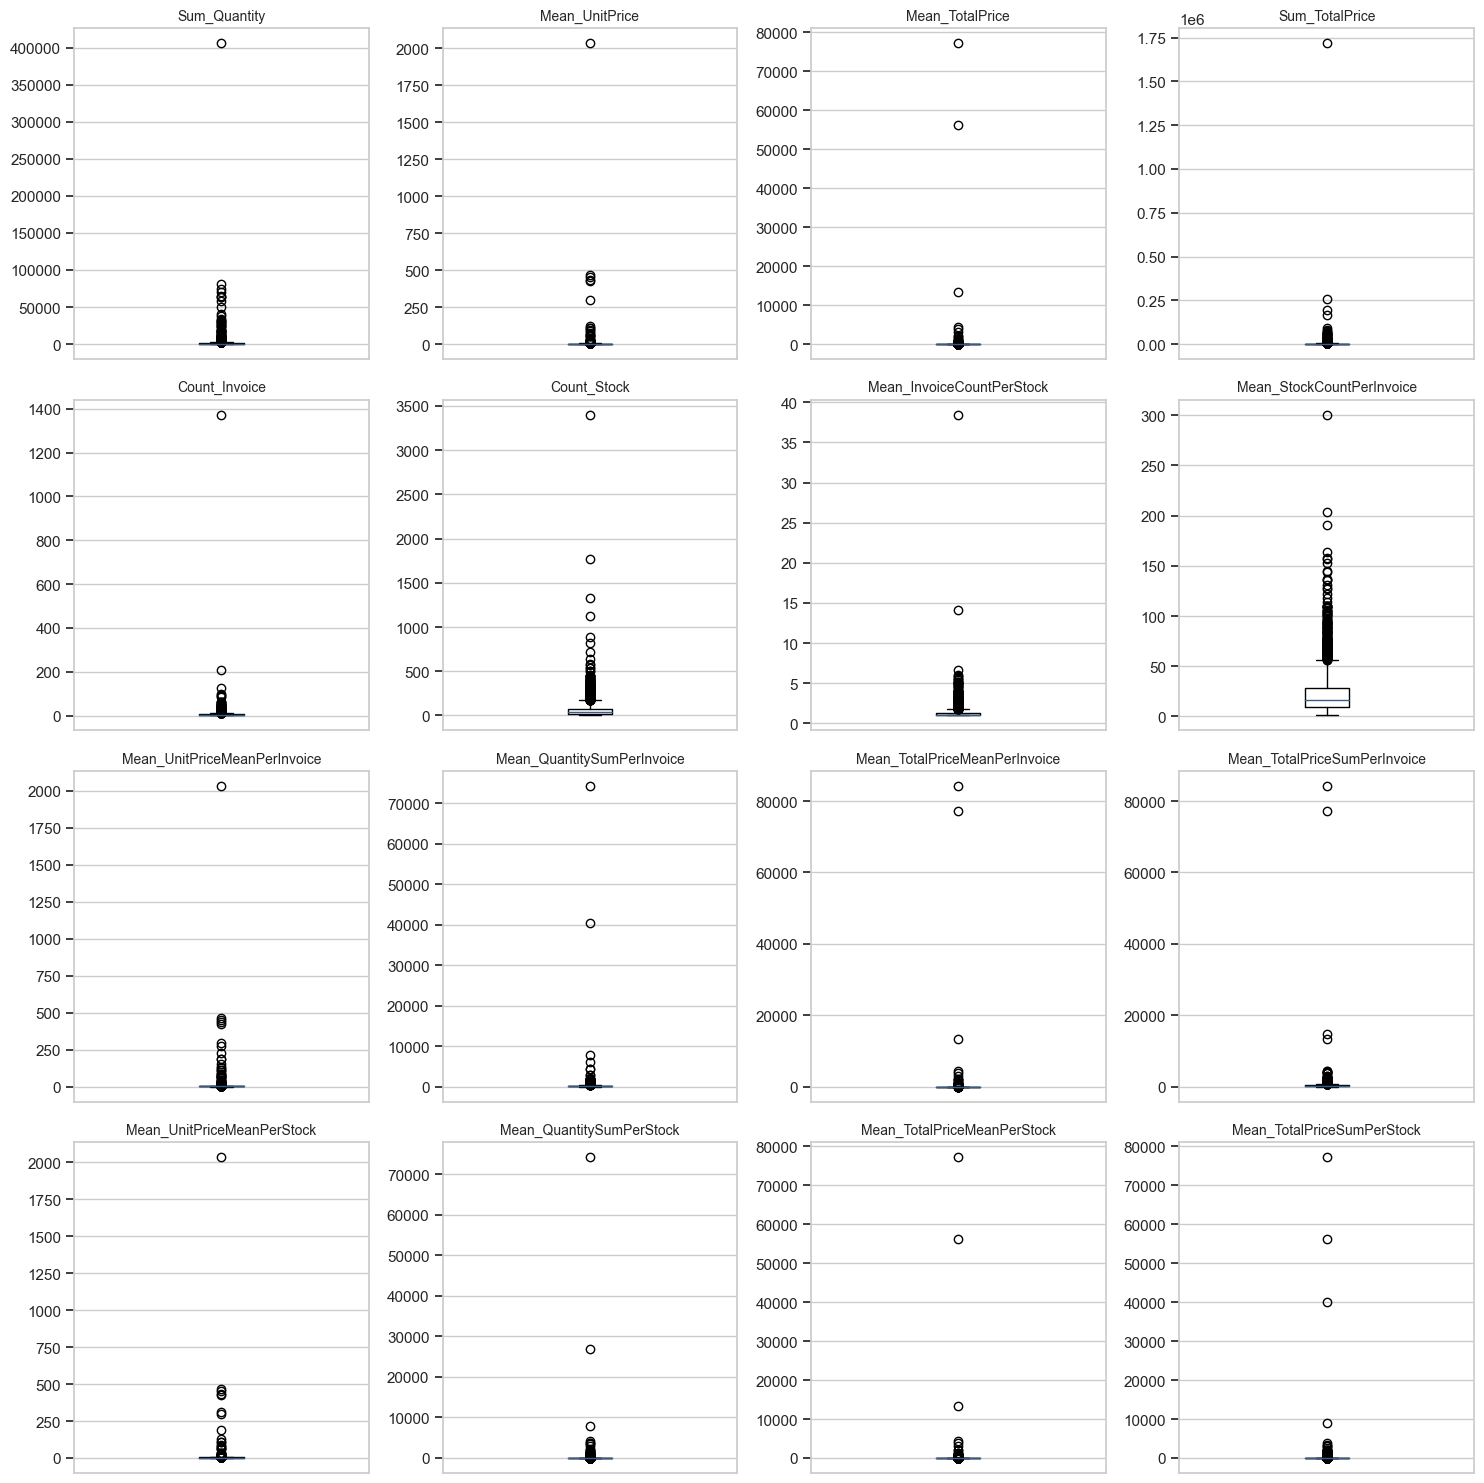

In [6]:
engineer.plot_features_boxplots(transformed=False)

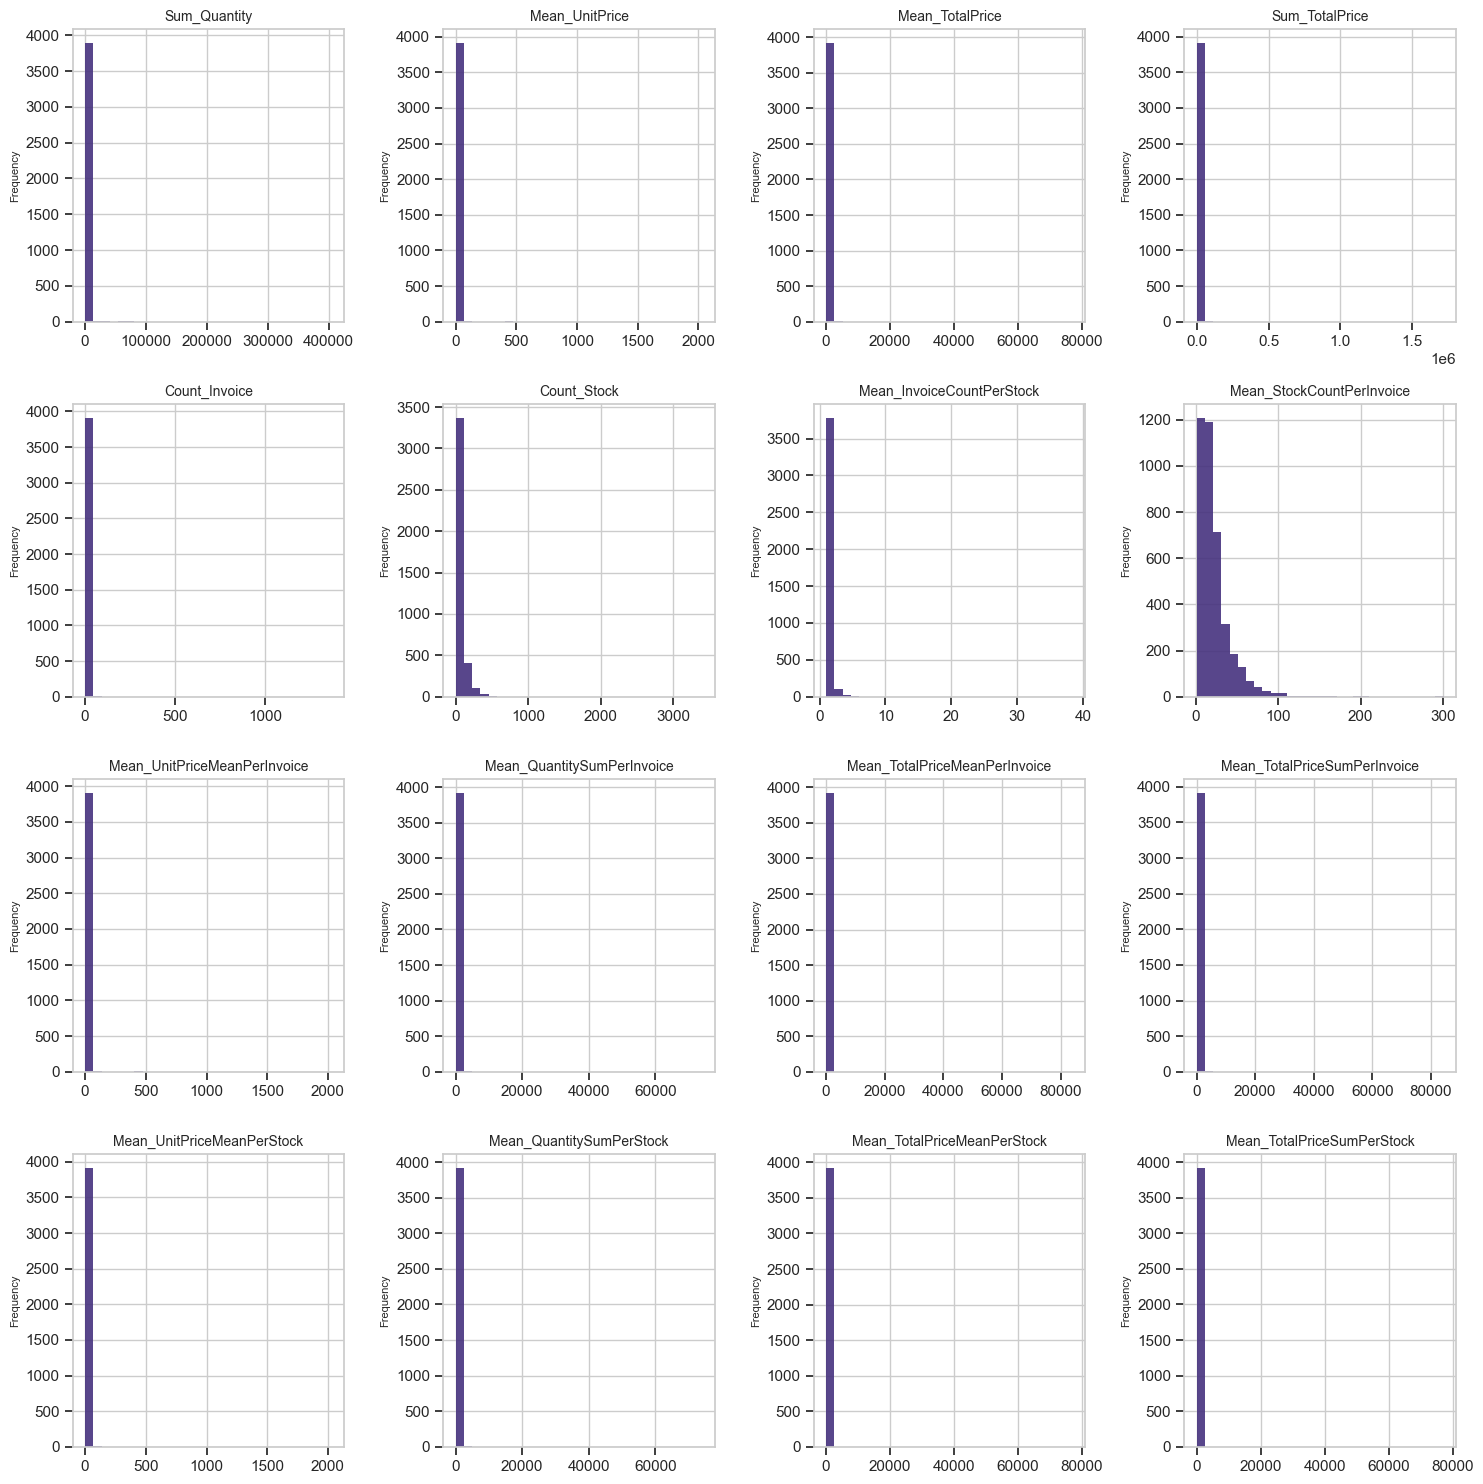

In [7]:
engineer.plot_features_histograms(transformed=False)

In [8]:
customer_features_transformed = engineer.transform_features()
customer_features_transformed.head()

Applying Box-Cox transformation...
✓ Box-Cox transformation applied!


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
000nan,12.418279,1.154552,1.783960,8.054674,1.308770,11.165280,0.164071,6.206762,1.366120,7.068362,2.192765,6.566697,1.271492,2.331470,1.804801,2.531434
012346,10.840137,0.579166,3.032064,7.072794,0.538659,0.711290,0.161671,0.724852,0.568083,17.423099,3.072899,9.889452,0.577185,2.816569,2.926912,2.798045
012747,6.997907,1.055109,2.175213,5.864822,1.115795,4.338777,0.163985,2.726268,1.005987,5.701499,2.211284,5.550015,1.076986,2.007588,2.022440,2.287020
012748,9.848243,0.898647,1.538424,6.760862,1.291683,9.997861,0.164005,3.857781,1.178474,5.787455,1.880484,4.797239,0.901924,1.768302,1.566559,1.856004
012749,7.134646,1.094081,1.952969,5.852844,0.978016,6.172607,0.162880,4.747467,1.053063,7.061952,1.987163,6.206524,1.073548,1.592866,1.912260,1.949339


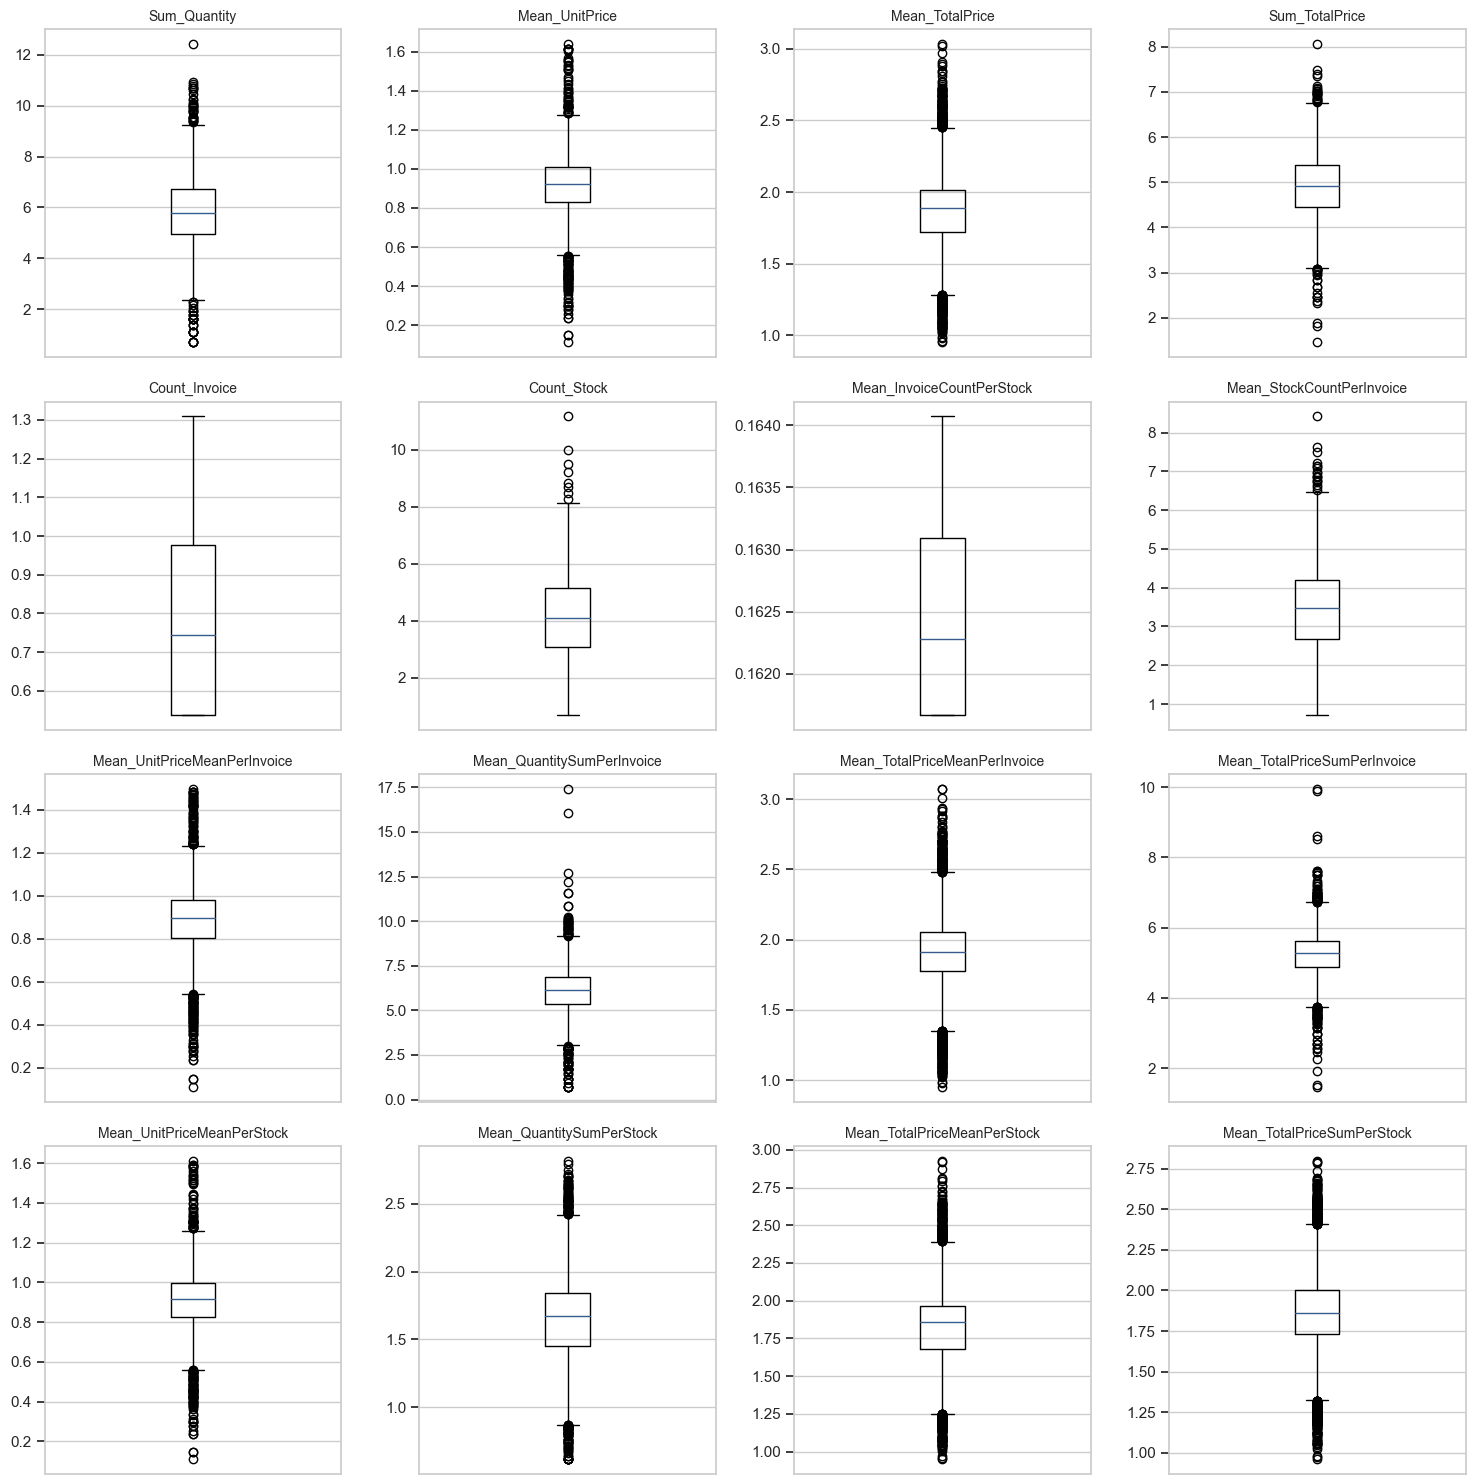

In [9]:
engineer.plot_features_boxplots(transformed=True)

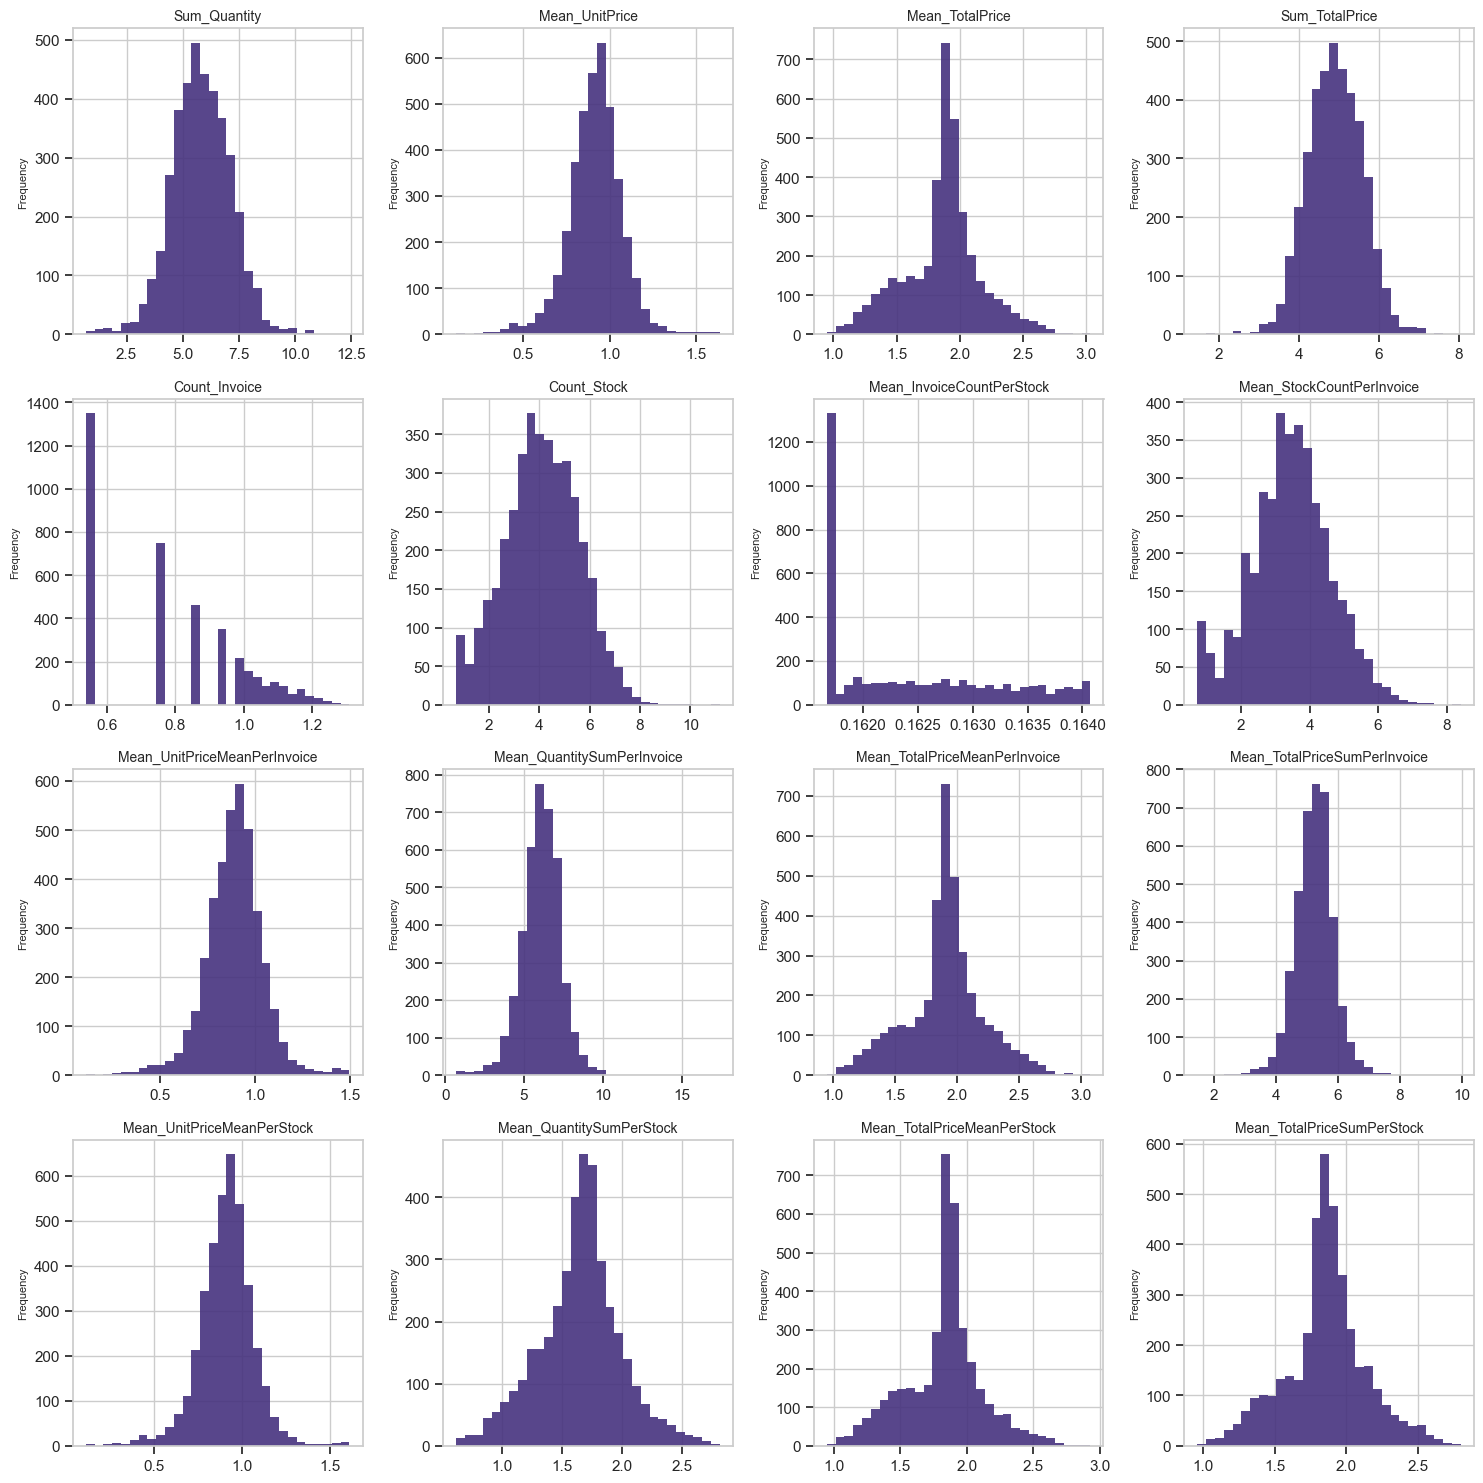

In [10]:
engineer.plot_features_histograms(transformed=True)

### Features standardization

In [11]:
customer_features_scaled = engineer.scale_features()
print(f"Scaled features shape: {customer_features_scaled.shape}")
customer_features_transformed.head()

✓ Features scaled!
Scaled features shape: (3921, 16)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
000nan,12.418279,1.154552,1.783960,8.054674,1.308770,11.165280,0.164071,6.206762,1.366120,7.068362,2.192765,6.566697,1.271492,2.331470,1.804801,2.531434
012346,10.840137,0.579166,3.032064,7.072794,0.538659,0.711290,0.161671,0.724852,0.568083,17.423099,3.072899,9.889452,0.577185,2.816569,2.926912,2.798045
012747,6.997907,1.055109,2.175213,5.864822,1.115795,4.338777,0.163985,2.726268,1.005987,5.701499,2.211284,5.550015,1.076986,2.007588,2.022440,2.287020
012748,9.848243,0.898647,1.538424,6.760862,1.291683,9.997861,0.164005,3.857781,1.178474,5.787455,1.880484,4.797239,0.901924,1.768302,1.566559,1.856004
012749,7.134646,1.094081,1.952969,5.852844,0.978016,6.172607,0.162880,4.747467,1.053063,7.061952,1.987163,6.206524,1.073548,1.592866,1.912260,1.949339


### Save features

In [12]:
engineer.save_features()

print("Summarization:")
print(f"- Total customers: {customer_features_scaled.shape[0]:,}")
print(f"- Total features: {customer_features_scaled.shape[1]}")
print("- Files saved:")
print("  + customer_features.csv: Original features")
print("  + customer_features_transformed.csv: Transformed features with Box-Cox")
print("  + customer_features_scaled.csv: Scaled features with StandardScaler")


✓ Features saved to ../data/processed/
Summarization:
- Total customers: 3,921
- Total features: 16
- Files saved:
  + customer_features.csv: Original features
  + customer_features_transformed.csv: Transformed features with Box-Cox
  + customer_features_scaled.csv: Scaled features with StandardScaler
